In [8]:
import os
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from tqdm import tqdm
import matplotlib.pyplot as plt
from utils import get_colors_dict, featre_to_tick
import pickle

save_root = 'explain_features/domain_classification/'
os.makedirs(save_root, exist_ok=True)
discov_val_feats_path = '/mnt/gpfs01/lsf-workspace/u2070124/Data/Data/pancancer/tcga_features_clinical_merged.csv'
# discov_val_feats_path = '/home/u2070124/lsf_workspace/Data/Data/pancancer/tcga_features_clinical_merged.csv'
discov_df = pd.read_csv(discov_val_feats_path)
discov_df['type'] = discov_df['type'].replace('COAD', 'COADREAD')
discov_df['type'] = discov_df['type'].replace('READ', 'COADREAD')
feats_list = pd.read_csv('noncorrolated_feature_list_2.csv', header=None)[0].to_list()
feats_list = [feat for feat in feats_list if feat not in ["mit_clusterCoff_max", "mit_hotspot_score"]]
feats_list = ["mit_nodeDegrees_mean",
"mit_nodeDegrees_max",
"mit_nodeDegrees_std",
"mit_clusterCoff_mean",
"mit_clusterCoff_std",
"mit_clusterCoff_perc80",
"mit_cenEigen_mean",
"mit_cenEigen_max",
"mit_cenHarmonic_mean",
"mit_cenHarmonic_std",]

discov_df = discov_df[discov_df['type']=='BRCA']

df = discov_df[['type']+feats_list]
invalid_cancers = ['DLBC','THYM','LAML','SARC','CHOL','ACC'] # keep PCPG
df = df[~df['type'].isin(invalid_cancers)]


# df[feats_list].to_csv('mosi.tsv', index=None, sep='\t')
# df['type'].to_csv('mosi_meta.tsv', index=None, sep='\t')

color_dict = get_colors_dict()
df['color'] = df['type'].map(color_dict)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

discov_df = discov_df[~discov_df['type'].isin(invalid_cancers)]

discov_df = discov_df[discov_df['mit_hotspot_score']!=0]

df_noramlized = scaler.fit_transform(discov_df[feats_list])

<Axes: >

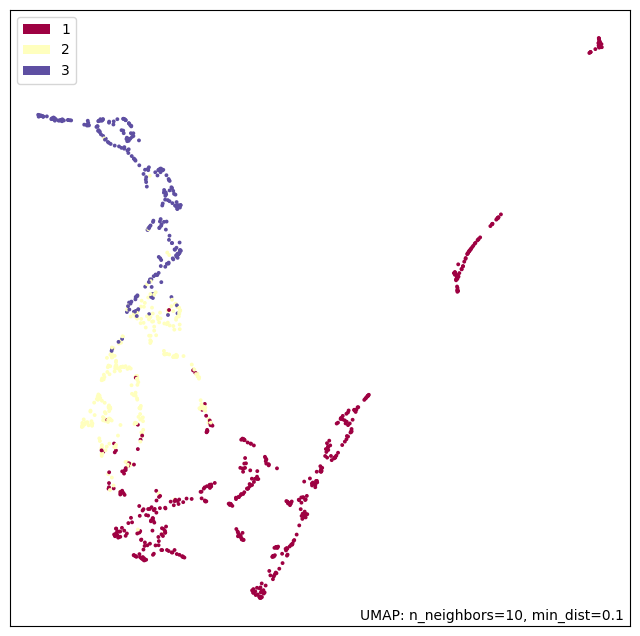

In [16]:
import pandas as pd
import numpy as np
import umap
import umap.plot
import os

feats_list = [
"mit_nodeDegrees_mean",
# "mit_nodeDegrees_max",
# "mit_nodeDegrees_std",
# "mit_clusterCoff_mean",
# "mit_clusterCoff_std",
# "mit_clusterCoff_perc80",
"mit_cenEigen_mean",
# "mit_cenEigen_max",
"mit_cenHarmonic_mean",
# "mit_cenHarmonic_std",
]

df_noramlized = scaler.fit_transform(discov_df[feats_list])

neigbor = 10
dist = 0.1
mapper = umap.UMAP(n_neighbors=neigbor, min_dist=dist).fit(df_noramlized)
umap.plot.points(mapper, labels=discov_df['mit_hotspot_score'])

In [ ]:
import pandas as pd
import numpy as np
import umap
import umap.plot
import os

save_root = 'UMAPs'
os.makedirs(save_root, exist_ok=True)
for neigbor in [5,10,15,20,25,30,35,40,50,75,100,150,200]:
    for dist in [.05, .1, .15, .2, .3, .4, .5, .6, .7, .8, .9, .95]:
        print(f'UMAP-{neigbor}-{dist}')
        mapper = umap.UMAP(n_neighbors=neigbor, min_dist=dist).fit(df_noramlized)
        umap.plot.points(mapper, labels=df['type'], color_key=color_dict)
        plt.savefig(f"{save_root}/Normalilzed-UMAP-{neigbor}-{dist}.png", bbox_inches='tight', dpi=600)

/home/u2070124/miniconda3/envs/tiaviz/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/u2070124/miniconda3/envs/tiaviz/lib/python3.10/site-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


<Axes: >

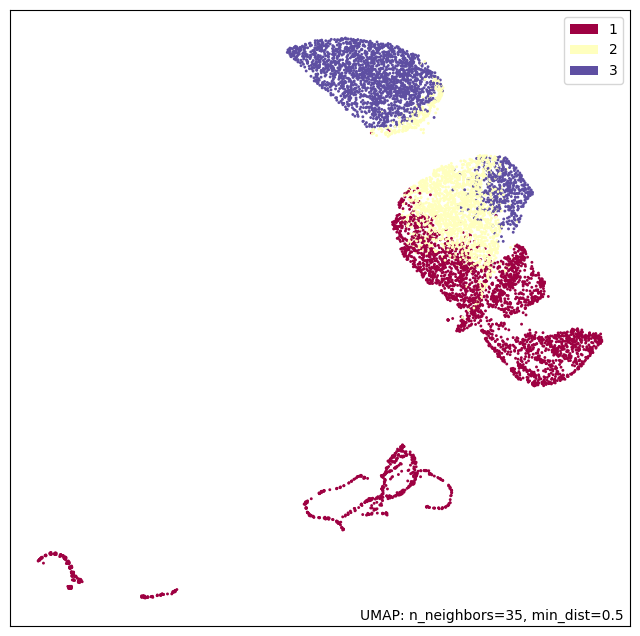

In [2]:
import pandas as pd
import numpy as np
import umap
import umap.plot
import os

save_root = 'explain_features/UMAPS-final'
os.makedirs(save_root, exist_ok=True)
neigbor = 35
dist = 0.5
mapper = umap.UMAP(n_neighbors=neigbor, min_dist=dist).fit(df_noramlized)
umap.plot.points(mapper, labels=discov_df['mit_hotspot_score'])
plt.savefig(f"{save_root}/Normalized-UMAP-{neigbor}-{dist}-mitosisScore.pdf", bbox_inches='tight', dpi=600)
plt.savefig(f"{save_root}/Normalized-UMAP-{neigbor}-{dist}-mitosisScore.png", bbox_inches='tight', dpi=600)
umap.plot.points(mapper, labels=discov_df['type'], color_key=color_dict)
plt.savefig(f"{save_root}/Normalized-UMAP-{neigbor}-{dist}-type.pdf", bbox_inches='tight', dpi=600)
plt.savefig(f"{save_root}/Normalized-UMAP-{neigbor}-{dist}-type.png", bbox_inches='tight', dpi=600)


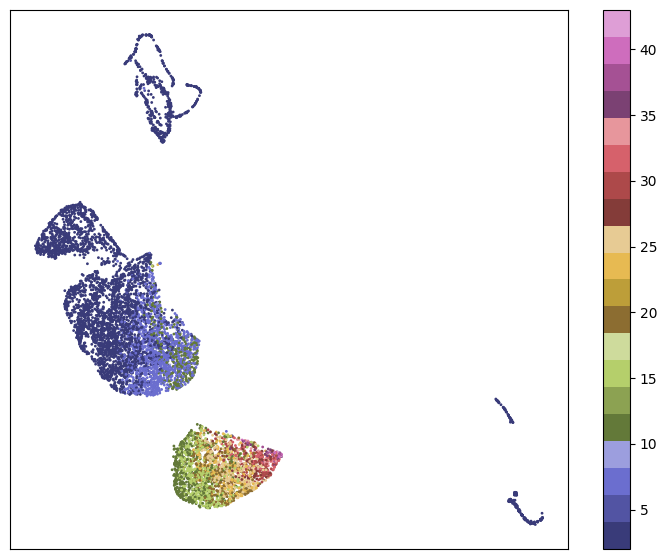

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

fig, ax = plt.subplots(figsize=(9,7))

# Assuming 'labels' is a list of numbers
labels = discov_df['mit_nodeDegrees_perc10']

# Create a colormap
# cmap = plt.cm.get_cmap('tab20b')
unique_labels = np.unique(labels)
num_labels = unique_labels.shape[0]
color_key = plt.get_cmap('tab20b')(np.linspace(0, 1, num_labels))
new_color_key = {
                k: matplotlib.colors.to_hex(color_key[i])
                for i, k in enumerate(unique_labels)
            }
colors = discov_df['mit_nodeDegrees_perc10'].map(new_color_key)

# Get the coordinates from UMAP
coords = mapper.embedding_

# Create a scatter plot
sc = ax.scatter(coords[:, 0], coords[:, 1], c=colors, s=1)

# Remove the old colorbar
plt.colorbar(sc, ax=ax).remove()

# Create a new colorbar with the correct range
norm = matplotlib.colors.Normalize(vmin=min(unique_labels), vmax=max(unique_labels))
cbar = plt.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap='tab20b'), ax=ax)

plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 

save_root = 'explain_features/UMAPS-final'
plt.savefig(f"{save_root}/Normalized-UMAP-{neigbor}-{dist}-NodeDegreePerc10.png", bbox_inches='tight', dpi=600)
plt.savefig(f"{save_root}/Normalized-UMAP-{neigbor}-{dist}-NodeDegreePerc10.pdf", bbox_inches='tight', dpi=600)

In [75]:
# 2D interactive
import plotly.express as px
import pandas as pd
import numpy as np
import umap
import umap.plot
import os

mapper = umap.UMAP(n_neighbors=35, min_dist=0.5, n_components=2).fit(df_noramlized)
# fig = px.scatter(mapper.embedding_, x=0, y=1, color=df['type'], hover_name=df['type'])
fig = px.scatter(mapper.embedding_, x=0, y=1, color=discov_df['mit_nodeDegrees_perc10'], hover_name=discov_df['bcr_patient_barcode'], size_max=1)
fig.show()

In [30]:
# 3D interactive

import umap
import plotly.graph_objs as go
import numpy as np


# Fit and transform your features
embedding_3d = mapper.embedding_

# Assuming 'colors' is your list of colors. This should be the same length as your data.
colors = df['color'].tolist()

# Create a trace for the scatter plot
trace = go.Scatter3d(
    x=embedding_3d[:, 0],
    y=embedding_3d[:, 1],
    z=embedding_3d[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=colors,                # set color to an array/list of desired values
        # colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

# Package the trace in a data object
data = [trace]

# Create a layout for the plot
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)

# Create a figure from the data and layout, and plot the figure
fig = go.Figure(data=data, layout=layout)
fig.show()
